In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment 5


**Ground Cricket Chirps**

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

**Tasks**
Find the linear regression equation for this data.
Chart the original data and the equation on the chart.
Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df.shape

(15, 2)

In [6]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


**Checking NULL values**

In [7]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

**Dropping Duplicates**

In [8]:
df = df.drop_duplicates()

**Checking datatypes**

In [9]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

**Checking Linear Relationship**

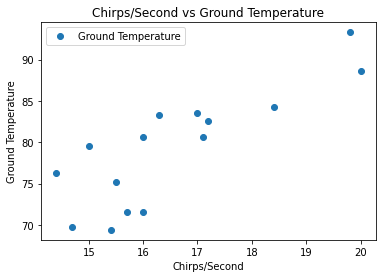

In [10]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [11]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a linear relationship between chirps/second and ground temparature => we can go ahead and develop a linear regression model. No transformation required.

In [11]:
df["Ground Temperature"].values

**Splitting the data**

In [11]:
x = df.loc[:, ['Chirps/Second']].values
y = df.loc[:, 'Ground Temperature'].values

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)


In [11]:
y_test

In [11]:
x_train.shape, x_test.shape

**Scaling the data**

In [11]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it


Scaling the data in linear regreesion is not mandatory.

In [11]:
x_test

**Model fitting**

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train, y_train)

**Finding predicted values**

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

**Finding co-efficient and intercept

1. Find the linear regression equation for this data.**

In [ ]:
M = regressor.coef_
C = regressor.intercept_
y = (M)*(18) + (C)
print("The Linear Regression equation is:",y)

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

In [ ]:
y = regressor.predict([[19.8]])  
y  # y = (3.18)*(19.8)+26.16

**2. Chart the original data and the equation on the chart.**

In [ ]:
plt.scatter(x,y)                     
y_new = regressor.coef_*x + regressor.intercept_            
plt.plot(x,y_new, 'r',lw=3, label='regression line') 
                                                     
plt.xlabel('Chirps/Second', fontsize=20)      
plt.ylabel('Ground Temperature', fontsize=20)       
plt.show()

5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
regressor.predict([[18]])  

**Chirping rate** = 18 chirps per second

**Ground temperature** = 83.407 (approximately).

 **Extrapolation data

4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [ ]:
X = df.loc[:, ['Ground Temperature']].values
y = df.loc[:,'Chirps/Second'].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

In [ ]:
y = regressor.predict([[95]])
print(y)

By interchange the feature and target columns,if the ground temperature reached 95 --> I predicted the chirps/second as 20.03.

**The ground temperature **= 95

**Approximate rate of chirping** = 20.035

**Comparing the actual and predicted values**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

 **Evaluation Metric

3. Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

**The evaluation metric R2 square value of linear regresssion is 71%.

The correlation value is greater than 0.8.

It represents strong correlation.**

# Assignment6

**Brain vs. Body Weight**

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

**Tasks**

Find the linear regression equation for this data for brain weight to body weight.
Chart the original data and the equation on the chart.
Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df1 = pd.read_fwf("/content/brain_body.txt")
df1.head()

In [ ]:
df1.describe()

In [ ]:
df1.shape

**Checking NULL values**

In [ ]:
df1.isnull().sum()

There is no null values in the data

**Dropping the Duplicate values**

In [ ]:
df1 = df1.drop_duplicates()

**Checking the Datatypes**



In [ ]:
df1.dtypes

**Finding outliers in Brain column**

In [ ]:
import seaborn as sns 
sns.boxplot(df1['Brain'])

**Calculating IQR**

In [ ]:
percentile25 = df1['Brain'].quantile(0.25)
percentile75 = df1['Brain'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

**Calculating min max Values**

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

**Cleaning Outliers by using Capping Technique**

In [ ]:
df1['Brain'] = np.where(
    df1['Brain']>max_value,
    max_value,
    np.where(
        df1['Brain']<min_value,
        min_value,
        df1['Brain']
    ) 
)
df1['Brain'].describe()


In [ ]:
sns.boxplot(df1['Brain'])

In [ ]:
sns.boxplot(df1['Body'])

**Finding IQR**

In [ ]:
percentile25 = df1['Body'].quantile(0.25)
percentile75 = df1['Body'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

**Calculating min max Values**

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

**Cleaning Outliers by using Capping Technique**

In [ ]:
df1['Body'] = np.where(
    df1['Body']>max_value,
    max_value,
    np.where(
        df1['Body']<min_value,
        min_value,
        df1['Body']
    ) 
)
df1['Body'].describe()

In [ ]:
sns.boxplot(df1['Body'])

No Ouliers in the data.

**Checking Linear Relationship**

In [ ]:
sns.scatterplot(data=df1,x='Brain',y='Body')

In [ ]:
df1.corr()

There is a linear relationship between brain and body => we can go ahead and develop a linear regression model. No transformation required.

In [ ]:
df1.Body.values

**Splitting the data**

In [ ]:
X = df1.loc[:, ['Brain']].values  
y = df1.loc[:, 'Body'].values 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)


In [ ]:
y_test

In [ ]:
X_train.shape, X_test.shape

**Scaling the data**

In [ ]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it


Scaling is not required for linear regression.

In [ ]:
X_test

**Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

**Finding intercept and coefficient**

In [ ]:
print(lr.intercept_)

In [ ]:
print(lr.coef_)

**1. Find the linear regression equation for this data for brain weight to body weight.**

In [ ]:
m = lr.intercept_
c = lr.coef_
print("m :",m)
print("c :",*c) 
#y = mx+c
x = float(input())
Y = lr.predict([[x]])
print("Y :",*Y)      #linear equation of this data.

**2. Chart the original data and the equation on the chart.**

In [ ]:
plt.scatter(X,y)                     
y_new = lr.coef_*X + lr.intercept_            
plt.plot(X,y_new, 'r',lw=3, label='regression line') 
                                                     
plt.xlabel('Brain', fontsize=20)      
plt.ylabel('Body', fontsize=20)       
plt.show()

**Finding Predicted Values**

In [ ]:
y_pred = lr.predict(X_test) 

y_pred

In [ ]:
lr.predict([[4603]]) # perils of extrapolation

**Comparing actual and predicted values**

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

 **Evaluation Metric

3. Find the equation's  score (use the .score method to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

**The evaluation metric R2 square value of linear regresssion is 82.99%.

The correlation value is greater than 0.8.

It represents strong correlation.**

# Assignment 7

Salary **Discrimination**

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
Year. Number of years in current rank.
Degree. Highest degree. 1 for doctorate, 0 for master's.
YSdeg. Years since highest degree was earned.
Salary. Salary/year in dollars.

**Tasks**

Find the linear regression equation for this data using columns 1-5 to column 6.
Find the selection of columns with the best  score.
Report whether sex is a factor in salary.

In [ ]:
df2 = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])


In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
df2.describe()

**Checking NULL Values**

In [ ]:
df2.isnull().sum()

**Dropping Duplicates**

In [ ]:
df2 = df2.drop_duplicates()

**Checking datatypes**

In [ ]:
df2.dtypes

Finding Outliers

In [ ]:
import seaborn as sns 
sns.boxplot(df2['Year'])

**Calculating IQR**

In [ ]:
percentile25 = df2['Year'].quantile(0.25)
percentile75 = df2['Year'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

**Finding Min Max Values**

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

**Cleanng Outliers By Using Capping Technique**

In [ ]:
df2['Year'] = np.where(
    df2['Year']>max_value,
    max_value,
    np.where(
        df2['Year']<min_value,
        min_value,
        df2['Year']
    ) 
)
df2['Year'].describe()

In [ ]:
sns.boxplot(df2['Year'])

No Outliers in data.

**Checking relationship between Sex feature and Salary target**

In [ ]:
df2.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

There is linear relationship in between sex and salary columns.

In [ ]:
a = df2['Sex']
a = a.map({1:'Male', 0:'Female'})

In [ ]:
df2.groupby(a)['Salary'].mean().plot(kind='bar')
plt.title('a vs Salary')
plt.xlabel('a')
plt.ylabel('Salary')
plt.show()

**Checking relationship between Rank feature and Salary target**

In [ ]:
df2.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [ ]:
df2[['Rank','Salary']].corr()

1) There is a linear relationship between rank and salary 2) As rank increases, salary also incerases which is in-line with our GK 3) No transformation required

**Checking relationship between Year feature and Salary target**

In [ ]:
df2.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [ ]:
df2[['Year','Salary']].corr()

1) There is a linear relationship between year and salary 2) As year increases, salary also incerases which is in-line with our GK 3) No transformation required

**Checking relationship between Degree feature and Salary target**

In [ ]:
df2.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

 There is linear relationship between degree and salary

**Checking relationship between YSdeg feature with Salary target**

In [ ]:
df2.groupby('YSdeg')['Salary'].mean().plot()
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [ ]:
df2[['YSdeg','Salary']].corr()

There is a linear relationship between ysdeg and salary 2) As year increases, salary also incerases which is in-line with our GK 3) No transformation required

**Splitting the data**

In [ ]:
X = df2[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values 
y = df2['Salary'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
scaler.var_

**Model fitting**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

**1.Find the linear regression equation for this data using columns 1-5 to column 6.**

In [ ]:
m=regressor.coef_
c=regressor.intercept_
y=regressor.predict([[1,3,7,1,27]]) #y=mx+c
print('y=',y)

**Finding Coefficients and Intercept**

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

In [ ]:
regressor.intercept_

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

**Evaluation Metric

2. Find the selection of columns with the best  score.**

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

 **The evaluation metric R2 square value of linear regresssion is 66.23%.

3.Report whether sex is a factor in salary.**

As compared to "Rank and Year" ,"Sex" having less feature importance.But, "Sex" also playing a important role in predicting Salary.